<a href="https://colab.research.google.com/github/shubhiiiiika/NNDL-LAB-2022/blob/main/CNN_Image_Classification_(CIFAR10_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

In [5]:
y_test.shape

(10000, 1)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
#Changing 2D array into 1D array.
y_test = y_test.reshape(-1,)

In [11]:
#Creating of all the categories in dataset, this helps in labeling the images.
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
#Function to lot image on a graph
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

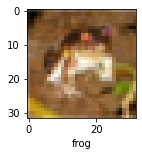

In [13]:
plot_sample(X_train, y_train, 0)

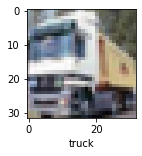

In [14]:
plot_sample(X_train, y_train, 1)

In [15]:
#Normalising into 0 to 1 range
#Dividing by 255 because pixel value ranges from 0 - 255 for each channel (rgb)
X_train = X_train / 255.0
X_test = X_test / 255.0


In [16]:
#Building the Model
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.8125 - accuracy: 0.3554
Epoch 2/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.6238 - accuracy: 0.4269
Epoch 3/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.5406 - accuracy: 0.4577
Epoch 4/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.4815 - accuracy: 0.4765
Epoch 5/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.4310 - accuracy: 0.4953


In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.45      0.52      1000
           1       0.65      0.56      0.60      1000
           2       0.36      0.41      0.38      1000
           3       0.35      0.40      0.37      1000
           4       0.46      0.37      0.41      1000
           5       0.44      0.32      0.37      1000
           6       0.58      0.48      0.53      1000
           7       0.57      0.54      0.56      1000
           8       0.53      0.69      0.60      1000
           9       0.46      0.69      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4576 - accuracy: 0.4762
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1108 - accuracy: 0.6103
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9965 - accuracy: 0.6518
Epoch 4/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.9174 - accuracy: 0.6784
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8637 - accuracy: 0.6978
Epoch 6/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.8134 - accuracy: 0.7171
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7681 - accuracy: 0.7333
Epoch 8/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.7306 - accuracy: 0.7453
Epoch 9/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6935 - accuracy: 0.7572
Epoch 10/10
1563/1563 [==============================] - 60s 38m

In [21]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9170 - accuracy: 0.6962


[0.9169656038284302, 0.6962000131607056]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.1632282e-02, 3.0770171e-03, 2.3890175e-03, 9.3771529e-01,
        2.3916253e-04, 2.8671628e-02, 5.1234146e-03, 2.5964424e-05,
        3.7176614e-03, 7.4086166e-03],
       [4.7153840e-03, 1.3703720e-02, 3.6838287e-06, 5.1500365e-07,
        4.8528307e-07, 5.3259348e-09, 3.3330707e-08, 1.5620566e-08,
        9.7954845e-01, 2.0277607e-03],
       [1.8101439e-02, 5.5111903e-01, 1.5822384e-03, 1.2351038e-03,
        1.9425205e-03, 1.8767526e-04, 1.2297080e-03, 2.2303840e-04,
        3.9487740e-01, 2.9501794e-02],
       [3.5911942e-01, 3.4398653e-02, 6.1415724e-02, 7.0113625e-04,
        4.8540361e-02, 2.3341894e-05, 2.5616857e-04, 1.2686224e-04,
        4.9501488e-01, 4.0352528e-04],
       [4.6522557e-05, 2.7555096e-04, 4.3750564e-03, 5.8529831e-02,
        4.3579581e-01, 2.5047720e-03, 4.9846157e-01, 1.7507901e-06,
        8.4634394e-06, 6.4016666e-07]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]  #comparing with y_test

[3, 8, 1, 8, 6]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

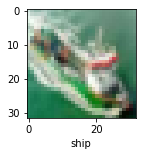

In [25]:
#Testing the Model
plot_sample(X_test, y_test,15)

In [26]:
classes[y_classes[9]]  #incorrect

'automobile'

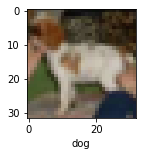

In [27]:
plot_sample(X_test, y_test,12)

In [28]:
classes[y_classes[12]]   #correct

'deer'